# Setup

In [11]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import numpy as np

Since rolling dice is so common, first I need to set up a small function to handle that.
<img src="dice.jpg" style="width: 100px;"/>


In [8]:
def rolldice(dicenum, dicetype):
    roll = 0
    for i in range(dicenum):
        roll = roll + random.randint(1,dicetype)
    return roll

# Defining the Fighter
Next, we define the abilities of the fighter

In [16]:
class Fighter(object):

    def __init__(self, name, ):
        """Return a Fighter object whose name is *name*"""
        self.name = name
    def equip(self, weapon):
        """Equip a Weapon."""
        if weapon == '2h sword':
            self.weapon = weapon
            self.dicenum = 2
            self.dicetype = 6
        elif weapon == '2h axe':
            self.weapon = weapon
            self.dicenum = 1
            self.dicetype = 12
        else:
            raise RuntimeError('That type of weapon is not available.')
        return self.weapon + " equipped"

    def GreatWeaponMaster(self):
        """Enables Great Weapon Master."""
        self.GreatWeaponMaster = True
        return 'enabled'
    def GreatWeaponFighter(self):
        """Enables the Fighting Style, Great Weapon Fighter"""
        self.GreatWeaponFighter = True
    def attack(self,enemyAC):
        """Simulates an attack on an enemy, returning how much damage is done"""
        hitroll = rolldice(1,20)
        damage = 0
        #Check if it hits, given the enemies AC
        if hitroll >= enemyAC: 
            """roll for damage, we didn't use the rolldice function here because great weapon master 
                needed to know what the roll was in case of a 1 or 2"""
            for i in range(self.dicenum):
                roll = random.randint(1,self.dicetype)
            
                #Great Weapon Fighters re-roll on 1's or 2's
                if roll in [1,2] and self.GreatWeaponFighter == True:
                    roll = random.randint(1,self.dicetype)
                
                damage = damage + roll  
        return damage


# Making our First Fighter

In [4]:
Tenzing = Fighter('Tenzing')

In [5]:
Tenzing.equip('2h sword')

'2h sword equipped'

In [6]:
Tenzing.GreatWeaponMaster()

'enabled'

In [13]:
Tenzing.attack(10)

11

# Simulation: Axe vs Sword with Great Weapon Fighter
Compare how the 2h axe (1d12) and the 2h sword (2d6) perform with the Greatp Weapon Fighter feat, (when rolling for damage, reroll 1s and 2s)

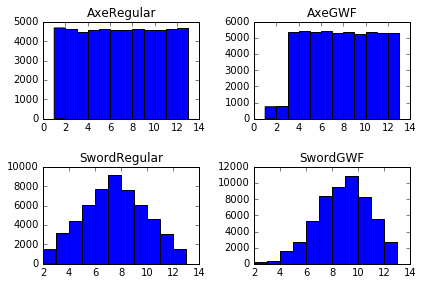

In [14]:
"""Set up the fighters"""
AxeRegular = Fighter("AxeRegular")
AxeRegular.equip('2h axe')

AxeGWF = Fighter("AxeGWF")
AxeGWF.equip('2h axe')
AxeGWF.GreatWeaponFighter()

SwordRegular = Fighter("SwordRegular")
SwordRegular.equip('2h sword')

SwordGWF = Fighter("SwordGWF")
SwordGWF.equip('2h sword')
SwordGWF.GreatWeaponFighter()

Fighters = [AxeRegular,AxeGWF,SwordRegular,SwordGWF]

"""Setup the Scenario"""
attempts = 100000
enemyAC = 10
dmgs = []
counter = 1

"""Some small helper functions"""
def plot_histogram(data):
    plt.hist(data,bins=np.arange(min(data), max(data)+2))

def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]
    
"""Calculate and Plot the Results"""
plt.figure(1)
    
for afighter in Fighters:
    dmg = []
    for i in range(attempts):
        dmg.append(afighter.attack(enemyAC))
    dmg = remove_values_from_list(dmg,0)
    dmgs.append(dmg)

    subplot_specification = 220+counter
    plt.subplot(subplot_specification)
    plot_histogram(dmg)
    plt.title(afighter.name)
    
    counter+=1
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)

In [15]:
for dmg in dmgs:
    print (numpy.mean(dmg))

6.50219028311
7.31523499336
7.00247003269
8.34175909675
